In [3]:
import pandas as pd
from urllib.parse import urlparse
import numpy as np
import nltk.data
from requests_html import HTMLSession

def parse_elements(url,element):
    session = HTMLSession()
    r = session.get(url)
    elements = r.html.find(element)
    return [element.text for element in elements]

url = 'https://www.utoronto.ca/about-u-of-t/quick-facts'
paragraphs = parse_elements(url, 'p')
links = parse_elements(url, 'a')

Insert source from u of t website on quick facts

In [4]:
df = pd.DataFrame(paragraphs, columns=['Text'])

In [5]:
df

,Text
0,The University of Toronto is a global leader i...
1,The University of Toronto has three campuses: ...
2,"U of T has 16,775 new full-time students enter..."
3,"* First Entry programs include Arts & Science,..."
4,The top five countries/regions of origin are C...
5,"16,503"
6,Faculty
7,"8,087"
8,Staff members
9,163


In [6]:
import requests
from bs4 import BeautifulSoup

response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')

# Find elements containing text data
text_elements = soup.find_all('div', class_='field field--name-field-add-text field--type-string-long field--label-hidden field__item')

# Find elements containing integer data
integer_elements = soup.find_all('div', class_='field field--name-field-add-number field--type-integer field--label-hidden field__item')

# Extract and print text data
for text_element in text_elements:
    text_data = text_element.text
    print(text_data)

# Extract and print integer data
for integer_element in integer_elements:
    integer_data = integer_element.text
    print(integer_data)

St. George
Mississauga
Scarborough
Domestic
International
Total
Graduate
Undergraduate
Total
Country/region
Students
China
India
United States
Korea (South)
Hong Kong
Taiwan
Iran
Türkiye
Indonesia
Japan
Pakistan
Country/region
Alumni
Canada
United States
China
Hong Kong
United Kingdom
Australia
Great Britain
India
Singapore
Japan
South Korea
 
Times Higher Education 2023
ShanghaiRanking Academic Ranking of World Universities 2023
QS World University Rankings 2024
U.S. News Best Global Universities 2022-23
NTU Ranking (formerly HEEACT) 2023
University of Toronto
20,335
903
379
16,252
5,365
21,617
46,905
15,199
13,957
52,993
23,068
76,061
67,240
16,102
14,336
69,245
28,433
97,678
15,717
2,405
1,189
890
655
501
422
320
305
276
274
614,656
27,274
6,075
5,747
2,011
1,227
1,224
1,213
980
903
839
18
24
21
18
5


The U of T website originally did not intend this for data analysis, and so I think I would just choose data as I see fit.

In [7]:
graduate_data = [
    "St. George", "Mississauga", "Scarborough", "Domestic", "International", "Total",
    20335, 903, 379, 16252, 5365, 21617
]

undergraduate_data = [
    "St. George", "Mississauga", "Scarborough", "Domestic", "International", "Total",
    46905, 15199, 13957, 52993, 23068, 76061
]

country_region_data = [
    "China", "India", "United States", "Korea (South)", "Hong Kong", "Taiwan", "Iran", 
    "Türkiye", "Indonesia", "Japan", "Pakistan",
    15717, 2405, 1189, 890, 655, 501, 422, 320, 305, 276, 274
]

alumni_data = [
    "Canada", "United States", "China", "Hong Kong", "United Kingdom", "Australia", 
    "Great Britain", "India", "Singapore", "Japan", "South Korea",
    614656, 27274, 6075, 5747, 2011, 1227, 1224, 1213, 980, 903, 839
]
# number of graduates, no. of UGs, students by country, alumni by country

In [8]:
grads = pd.DataFrame({
    "Campus": graduate_data[:6],
    "Graduates": graduate_data[6:]
})

print(grads)

          Campus  Graduates
0     St. George      20335
1    Mississauga        903
2    Scarborough        379
3       Domestic      16252
4  International       5365
5          Total      21617


In [9]:
undergrads = pd.DataFrame({
    "Campus": undergraduate_data[:6],
    "Undergraduates": undergraduate_data[6:]
})

print(undergrads)

          Campus  Undergraduates
0     St. George           46905
1    Mississauga           15199
2    Scarborough           13957
3       Domestic           52993
4  International           23068
5          Total           76061


In [10]:
country_origin = pd.DataFrame({
    "Country/region": country_region_data[:11],
    "Students": country_region_data[11:]
})

print(country_origin)

   Country/region  Students
0           China     15717
1           India      2405
2   United States      1189
3   Korea (South)       890
4       Hong Kong       655
5          Taiwan       501
6            Iran       422
7         Türkiye       320
8       Indonesia       305
9           Japan       276
10       Pakistan       274


In [11]:
alumni_origin = pd.DataFrame({
    "Country/region": alumni_data[:11],
    "Alumnis": alumni_data[11:]
})

print(alumni_origin)

    Country/region  Alumnis
0           Canada   614656
1    United States    27274
2            China     6075
3        Hong Kong     5747
4   United Kingdom     2011
5        Australia     1227
6    Great Britain     1224
7            India     1213
8        Singapore      980
9            Japan      903
10     South Korea      839


In [12]:

for element in soup(['script', 'style', 'comment']):
    element.extract()

text = soup.get_text(separator=' ')

print(text)


 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 Quick facts | University of Toronto 
 
 
 
 
 
 
 
      Skip to main content
     
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 Main menu tools 
 
 
 Email 
 
 
 Quercus 
 
 
 Acorn 
 
 
 
 
 
 
   
 Campus status 
 
 
 
 
 
 
 
 
 
 
 
 
 Search the U of T website 
 
 
 
  Search 
 
 
 
 
 
 
 Jump to menu 
 
 Jump to... 
 
 
 
 
 
 
 News & Media 
 
 
 About U of T 
 
 
 Give to U of T 
 
 
 Academics 
 
 
 Programs of study 
 
 
 Research & innovation 
 
 
 University life 
 
 
 Libraries 
 
 
 A to Z directory 
 
 
 
 
 
 
 
 News & Media 
 
 
 About U of T 
 
 
 Give to U of T 
 
 
 Academics 
 
 
 Programs of study 
 
 
 Research & innovation 
 
 
 University life 
 
 
 Libraries 
 
 
 A to Z directory 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 Search the U of T website 
 
 
 
  Search 
 
 
 
 
 
 
 
 
 Main navigation 
 
 
 Future students 
 
 
 Current students 
 
 
 Alumni 
 
 
 Faculty and Staff 
 
 
 Donors 
 
 
 Visitors 
 
 
 
 
 
 
 
 Main menu too

Here, we reveal the entire soup.

In [13]:
links = parse_elements(url, 'a')
links

['Skip to main content',
 '',
 'Email',
 'Quercus',
 'Acorn',
 'Campus status',
 'News & Media',
 'About U of T',
 'Give to U of T',
 'Academics',
 'Programs of study',
 'Research & innovation',
 'University life',
 'Libraries',
 'A to Z directory',
 'News & Media',
 'About U of T',
 'Give to U of T',
 'Academics',
 'Programs of study',
 'Research & innovation',
 'University life',
 'Libraries',
 'A to Z directory',
 '',
 'Future students',
 'Current students',
 'Alumni',
 'Faculty and Staff',
 'Donors',
 'Visitors',
 'Email',
 'Quercus',
 'Acorn',
 'Campus status',
 'Future students',
 'Current students',
 'Alumni',
 'Faculty and Staff',
 'Donors',
 'Visitors',
 'News & Media',
 'About U of T',
 'Give to U of T',
 'Academics',
 'Programs of study',
 'Research & innovation',
 'University life',
 'Libraries',
 'A to Z directory',
 'News & Media',
 'About U of T',
 'Give to U of T',
 'Academics',
 'Programs of study',
 'Research & innovation',
 'University life',
 'Libraries',
 'A to Z d

In [14]:
points = parse_elements(url, 'li')
points

['Email',
 'Quercus',
 'Acorn',
 'News & Media',
 'About U of T',
 'Give to U of T',
 'Academics',
 'Programs of study',
 'Research & innovation',
 'University life',
 'Libraries',
 'A to Z directory',
 'News & Media',
 'About U of T',
 'Give to U of T',
 'Academics',
 'Programs of study',
 'Research & innovation',
 'University life',
 'Libraries',
 'A to Z directory',
 'Future students',
 'Current students',
 'Alumni',
 'Faculty and Staff',
 'Donors',
 'Visitors',
 'Email',
 'Quercus',
 'Acorn',
 'Future students',
 'Current students',
 'Alumni',
 'Faculty and Staff',
 'Donors',
 'Visitors',
 'News & Media',
 'About U of T',
 'Give to U of T',
 'Academics',
 'Programs of study',
 'Research & innovation',
 'University life',
 'Libraries',
 'A to Z directory',
 'News & Media',
 'About U of T',
 'Give to U of T',
 'Academics',
 'Programs of study',
 'Research & innovation',
 'University life',
 'Libraries',
 'A to Z directory',
 'About U of T',
 'Mission',
 'Quick facts',
 'Reports and a

In [15]:
links = soup.find_all('a')

links_set = set()

for link in links:
    href = link.get('href')
    if href:
        links_set.add(href)

len(links_set)
# count links

55

In [18]:
pd.options.display.max_colwidth = None
# try to maximize text width... for the entire text

In [19]:
df.iloc[1:54]

,Text
1,"The University of Toronto has three campuses: St. George (downtown Toronto), Mississauga (west of Toronto) and Scarborough (east of Toronto). For more information please see our U of T campuses page."
2,"U of T has 16,775 new full-time students entering our First Entry* undergraduate programs in fall 2022-23:"
3,"* First Entry programs include Arts & Science, Applied Science & Engineering, Architecture, Kinesiology & Physical Education, Music and Transitional Year Program."
4,"The top five countries/regions of origin are China, India, United States, South Korea and Hong Kong."
5,"16,503"
6,Faculty
7,"8,087"
8,Staff members
9,163
10,Librarians


Given that quick facts are not a long document, I think df is already the most useful extracted text so far.

In [21]:
student_pop = pd.merge(grads, undergrads, on="Campus", how="left")
student_pop
# merge student tables

,Campus,Graduates,Undergraduates
0,St. George,20335,46905
1,Mississauga,903,15199
2,Scarborough,379,13957
3,Domestic,16252,52993
4,International,5365,23068
5,Total,21617,76061


In [22]:
origin = pd.merge(country_origin, alumni_origin, on="Country/region", how="outer")
origin

,Country/region,Students,Alumnis
0,China,15717.0,6075.0
1,India,2405.0,1213.0
2,United States,1189.0,27274.0
3,Korea (South),890.0,NaN
4,Hong Kong,655.0,5747.0
5,Taiwan,501.0,NaN
6,Iran,422.0,NaN
7,Türkiye,320.0,NaN
8,Indonesia,305.0,NaN
9,Japan,276.0,903.0


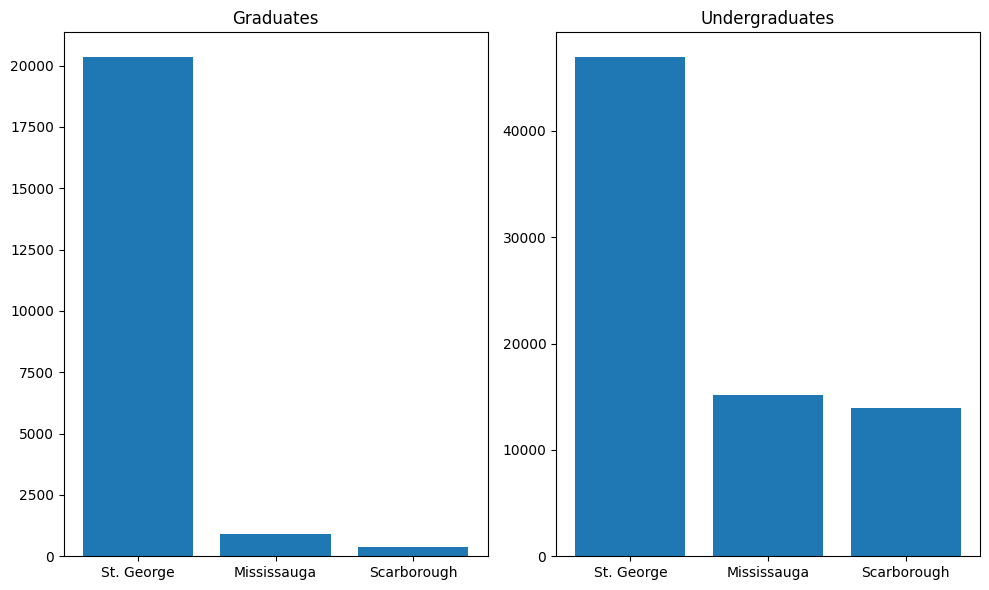

In [36]:
import matplotlib.pyplot as plt

campuses_only = student_pop.loc[student_pop['Campus'].isin(['St. George', 'Mississauga', 'Scarborough'])]

plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
plt.bar(campuses_only['Campus'], campuses_only['Graduates'])
plt.title('Graduates')

plt.subplot(1, 2, 2)
plt.bar(campuses_only['Campus'], campuses_only['Undergraduates'])
plt.title('Undergraduates')

plt.tight_layout()
plt.show()

The bar graphs show visually the trends of population. St. George was the largest campus. More analysis below.

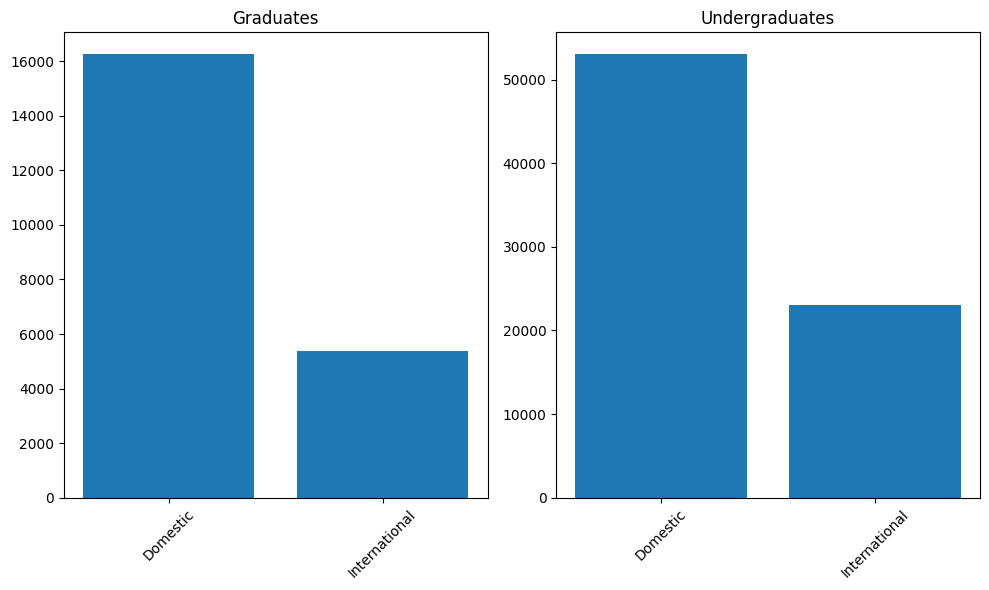

In [37]:
domestic_international = student_pop.loc[student_pop['Campus'].isin(['Domestic', 'International'])]

plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
plt.bar(domestic_international['Campus'], domestic_international['Graduates'])
plt.title('Graduates')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
plt.bar(domestic_international['Campus'], domestic_international['Undergraduates'])
plt.title('Undergraduates')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In both levels, international students accounted for a sizeable portion, about one-third of the entire populace (and at both levels).

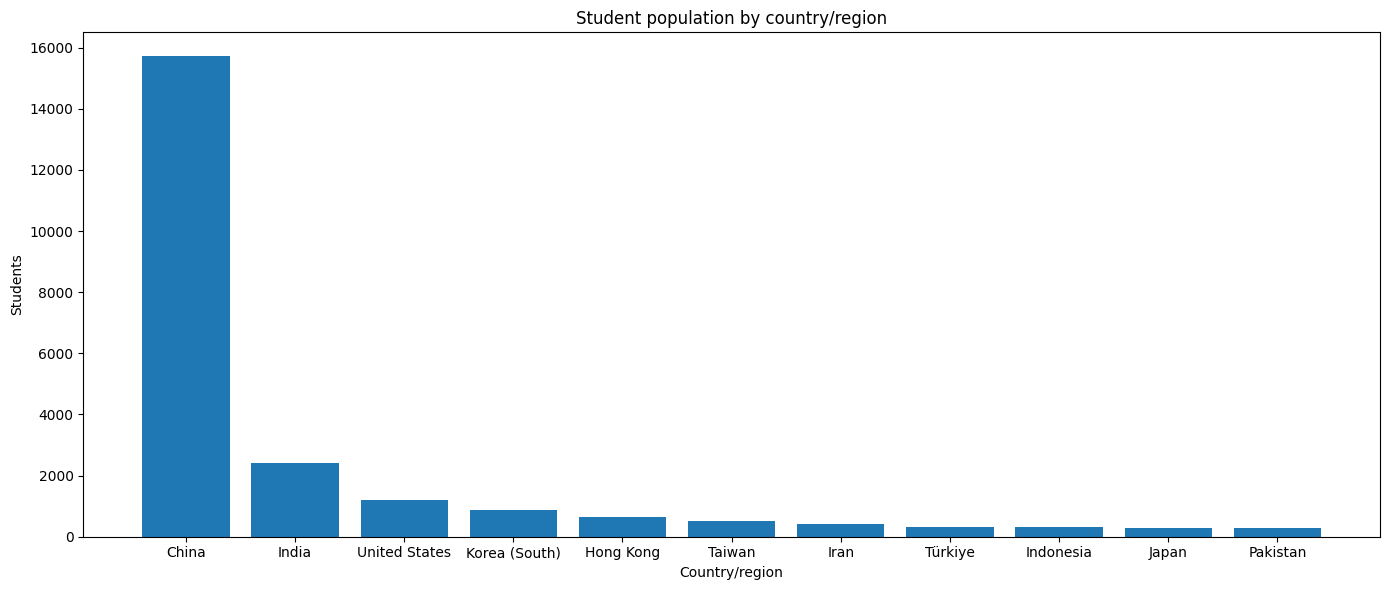

In [35]:
plt.figure(figsize=(14, 6))

plt.bar(country_origin['Country/region'], country_origin['Students'])
plt.xlabel('Country/region')
plt.ylabel('Students')
plt.title('Student population by country/region')

plt.tight_layout()
plt.show()

Top 10 countries/regions of student population in bars

Obviously, Canada (locals) had the largest number of both students and alumni. For illustration purposes, we would like to exclude Canada and look at the rest of countries/regions.

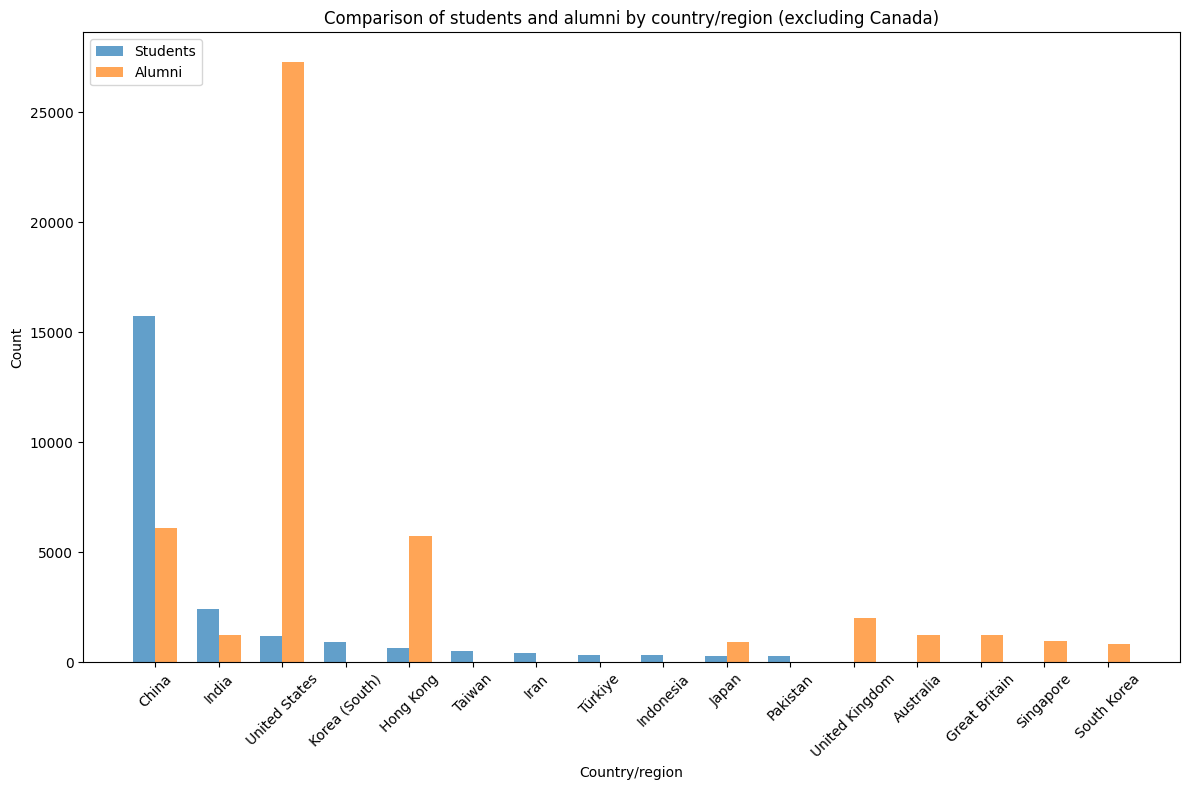

In [39]:
plt.figure(figsize=(12, 8))

filtered_origin = origin[origin['Country/region'] != 'Canada']

countries = filtered_origin['Country/region']
students = filtered_origin['Students']
alumni = filtered_origin['Alumnis']

bar_width = 0.35
index = np.arange(len(countries))

plt.bar(index, students, bar_width, label='Students', alpha=0.7)
plt.bar(index + bar_width, alumni, bar_width, label='Alumni', alpha=0.7)

plt.xlabel('Country/region')
plt.ylabel('Count')
plt.title('Comparison of students and alumni by country/region (excluding Canada)')
plt.xticks(index + bar_width / 2, countries, rotation=45)
plt.legend()

plt.tight_layout()
plt.show()

While numbers are already obvious, it is all the more obvious when we look at bar graphs. American alumnis actually accounted for the second-largest, right after Canada itself. By alumni, we also mean historical figures since the foundation of U of T. On the other hand, the recent development was the presence of over 15000 Chinese students. So, right from this, we could infer China will eventually surpass the US as the second-largest country of origin of alumni.

Hong Kong, as a tiny city, had a disproportionate number of alumni, and we can foresee it will remain the origin of the fourth-largest alumni group.

We can also infer that most countries of origin were Asian or Anglophone countries. Wait, it seems the website confused United Kingdom with Great Britain which are almost the same country as we know.

In [45]:
correct_alumni_data = [
    "Canada", "United States", "China", "Hong Kong", "United Kingdom", "Australia", 
    "India", "Singapore", "Japan", "South Korea",
    614656, 27274, 6075, 5747, 2011 + 1224, 1227, 1213, 980, 903, 839
]

In [47]:
alumni2 = pd.DataFrame({
    "Country/region": correct_alumni_data[:10],
    "Alumnis": correct_alumni_data[10:]
})

print(alumni2)

   Country/region  Alumnis
0          Canada   614656
1   United States    27274
2           China     6075
3       Hong Kong     5747
4  United Kingdom     3235
5       Australia     1227
6           India     1213
7       Singapore      980
8           Japan      903
9     South Korea      839


Phew, finally UK is "united"!

In [48]:
origin2 = pd.merge(country_origin, alumni2, on="Country/region", how="outer")
origin2

,Country/region,Students,Alumnis
0,China,15717.0,6075.0
1,India,2405.0,1213.0
2,United States,1189.0,27274.0
3,Korea (South),890.0,NaN
4,Hong Kong,655.0,5747.0
5,Taiwan,501.0,NaN
6,Iran,422.0,NaN
7,Türkiye,320.0,NaN
8,Indonesia,305.0,NaN
9,Japan,276.0,903.0


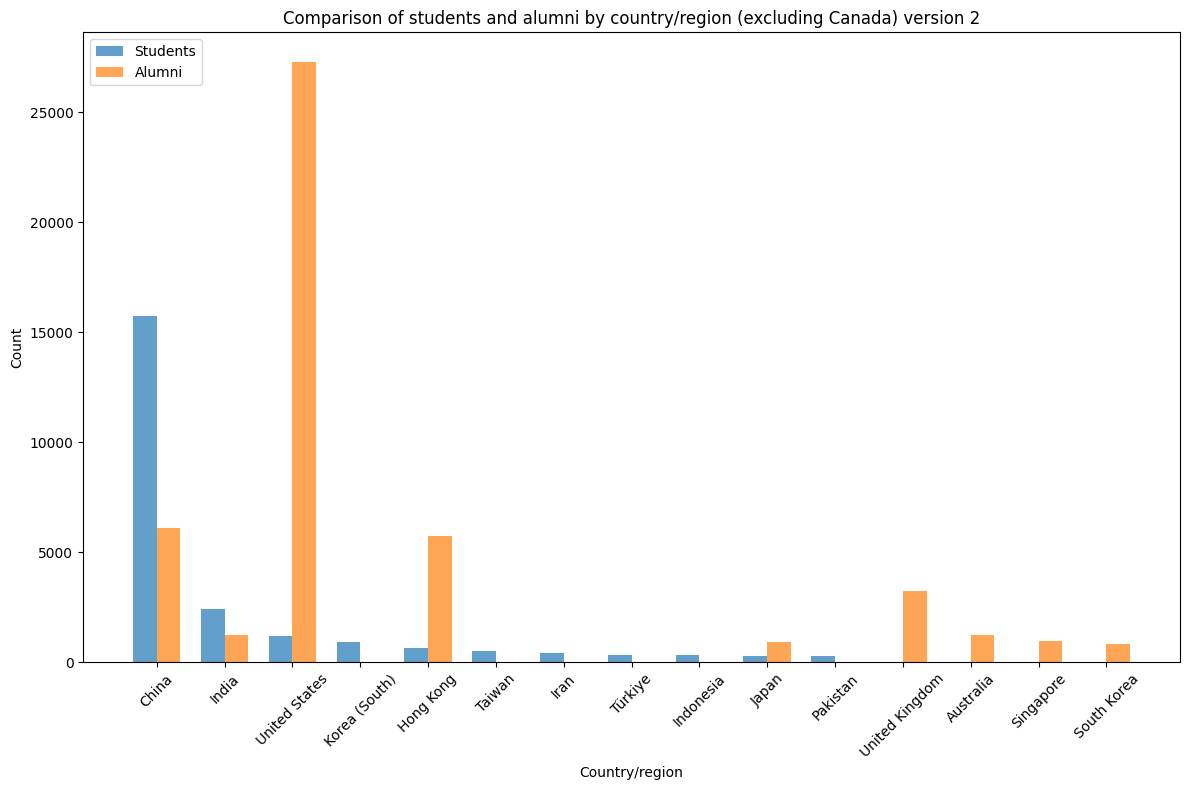

In [49]:
plt.figure(figsize=(12, 8))

filtered_origin = origin2[origin2['Country/region'] != 'Canada']

countries = filtered_origin['Country/region']
students = filtered_origin['Students']
alumni = filtered_origin['Alumnis']

bar_width = 0.35
index = np.arange(len(countries))

plt.bar(index, students, bar_width, label='Students', alpha=0.7)
plt.bar(index + bar_width, alumni, bar_width, label='Alumni', alpha=0.7)

plt.xlabel('Country/region')
plt.ylabel('Count')
plt.title('Comparison of students and alumni by country/region (excluding Canada) version 2')
plt.xticks(index + bar_width / 2, countries, rotation=45)
plt.legend()

plt.tight_layout()
plt.show()